In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\swara\\Downloads\\archive\\Lung Disease Dataset\\train'
valid_path = 'C:\\Users\\swara\\Downloads\\archive\\Lung Disease Dataset\\val'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob(train_path + '/*')

In [6]:
# Create a new model on top of the VGG16 base
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Assuming  5 classes for the example



In [7]:

# view the structure of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
optimizer=Adam(learning_rate=0.0001)

In [9]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                 patience=3,
                                 verbose=1,
                                 factor=0.5,
                                 min_lr=0.00001)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale =  1./255,
                                   shear_range =  0.2,
                                   zoom_range =  0.2,
                                    rotation_range=20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale =  1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(directory='C:\\Users\\swara\\Downloads\\archive\\Lung Disease Dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,

                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory(directory='C:\\Users\\swara\\Downloads\\archive\\Lung Disease Dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [14]:
valid_set = test_datagen.flow_from_directory(directory='C:\\Users\\swara\\Downloads\\archive\\Lung Disease Dataset\\val',
                                             target_size = (224,  224),
                                             batch_size =  32,
                                             class_mode = 'categorical')

Found 2016 images belonging to 5 classes.


In [15]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)


Epoch 1/100


C:\Users\swara\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


190/190 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.6546 - loss: 0.9514 - val_accuracy: 0.7798 - val_loss: 0.5348
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


C:\Users\swara\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


190/190 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.7791 - loss: 0.5573 - val_accuracy: 0.7664 - val_loss: 0.6226
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.7909 - loss: 0.5166 - val_accuracy: 0.8219 - val_loss: 0.4371
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.8060 - loss: 0.4730 - val_accuracy: 0.7852 - val_loss: 0.5426
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.8140 - loss: 0.4542 - val_accuracy: 0.8294 - val_loss: 0.4022
Epoch 10/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/

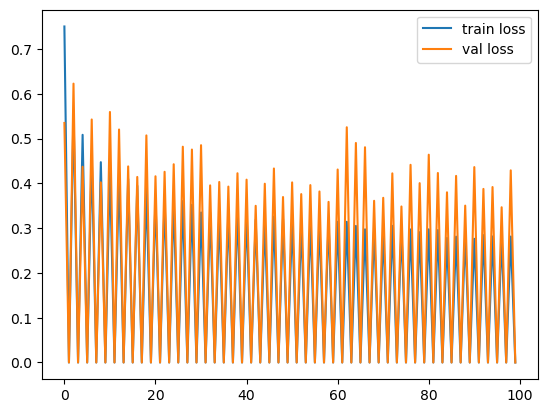

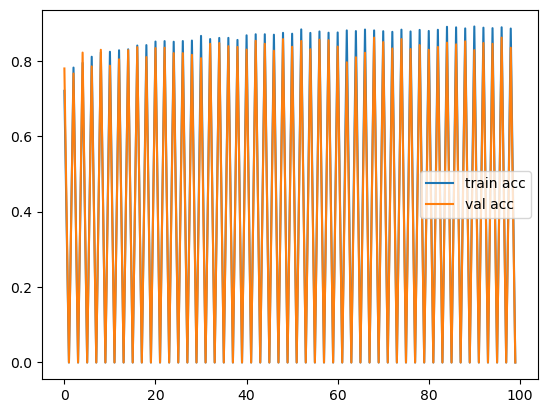

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('modelf8_vgg16.1.keras')

In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )

  return img


In [ ]:
path = "/content/drive/MyDrive/dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg"

img = get_img_array(path)

class_type = [  'Bacterial Pneumonia','Corona Virus Disease', 'Normal','Tuberculosis','Viral Pneumonia']  # Define class_type here

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()

plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()
